importando librerias

In [41]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [27]:
ytr = ytr.reshape(-1,)
yt = yt.reshape(-1,)

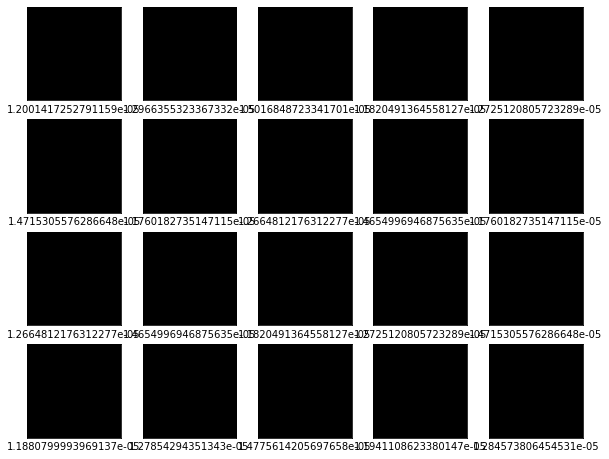

In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for image in range(0,20):
  i=image
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  j=i+0 # añadir de 5 en 5 para cambiar el bloque de fotos
  data_plot = xtr[j]
  plt.imshow(data_plot)
  plt.xlabel(str(yt[j]))
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4922 - accuracy: 0.4575 - val_loss: 1.2619 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1472 - accuracy: 0.5934 - val_loss: 1.0665 - val_accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0066 - accuracy: 0.6455 - val_loss: 1.0024 - val_accuracy: 0.6445
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9150 - accuracy: 0.6786 - val_loss: 0.9623 - val_accuracy: 0.6601
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8328 - accuracy: 0.7096 - val_loss: 0.8757 - val_accuracy: 0.6946
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7702 - accuracy: 0.7284 - val_loss: 0.9430 - val_accuracy: 0.6814
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7244 - accuracy: 0.7472 - val_loss: 0.8611 -

313/313 - 4s - loss: 0.8789 - accuracy: 0.7128 - 4s/epoch - 12ms/step


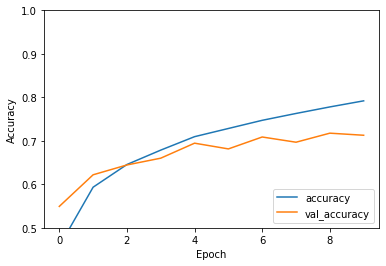

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [35]:
print(test_acc)

0.7128000259399414


In [36]:
predictions = model.predict(test_images)

In [37]:
predictions[0]

array([ 1.9936407 , -1.5309168 , -1.1519839 ,  2.8296137 , -3.6679125 ,
        2.1592016 , -1.1192188 , -3.3034444 , -0.32756752, -1.94004   ],
      dtype=float32)

In [42]:
np.argmax(predictions[0])

3

In [43]:
test_labels[0]

array([3], dtype=uint8)

<function matplotlib.pyplot.show>

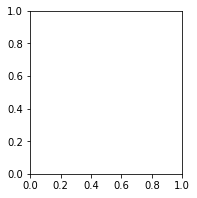

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,2)
plt.show

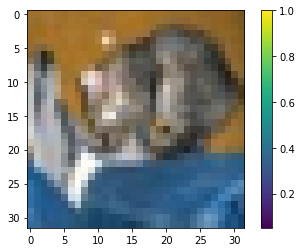

In [45]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()